In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections

### Simple EDA

In [27]:
df = pd.read_csv("usa-v1-preprocessed.csv")

In [28]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348335 entries, 0 to 348334
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Text                               348335 non-null  object
 1   new_text                           348335 non-null  object
 2   languages                          348335 non-null  object
 3   pos_tagged_words                   348335 non-null  object
 4   words_processed_all                348335 non-null  object
 5   words_processed_noun_adj_verb_adv  348335 non-null  object
 6   words_processed_noun               348335 non-null  object
dtypes: object(7)
memory usage: 18.6+ MB


In [30]:
df[df.duplicated()==True]

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun


In [31]:
df.describe()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
count,348335,348335,348335,348335,348335,348335,348335
unique,348335,348328,1,345011,343372,339375,295280
top,want find way end racism try force people inje...,pfizer did not take government money.,ENGLISH,[],[],[],[]
freq,1,2,348335,362,432,1164,9582


In [32]:
df.dtypes

Text                                 object
new_text                             object
languages                            object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [33]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin..."
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma..."


In [34]:
df["languages"].value_counts()

ENGLISH    348335
Name: languages, dtype: int64

### Sentence Length Distribution

In [35]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 301, Min length: 1, Average Length :  147.8478906799489


<AxesSubplot:>

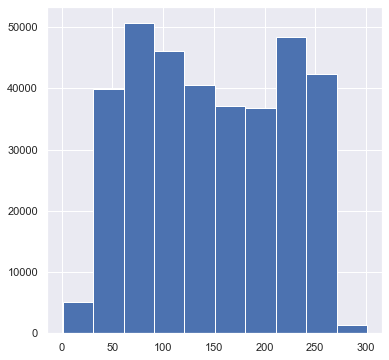

In [36]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [37]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["Text"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [38]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",43
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",21
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",45
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",38
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",40


In [39]:
df["word_count"].describe()

count    348335.000000
mean         23.981753
std          11.556416
min           1.000000
25%          14.000000
50%          23.000000
75%          34.000000
max          88.000000
Name: word_count, dtype: float64

<AxesSubplot:>

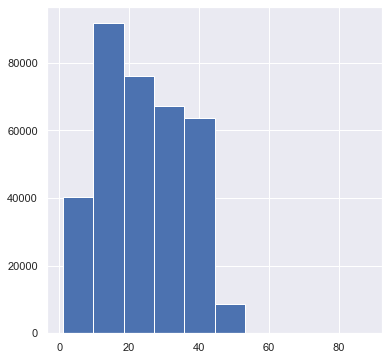

In [40]:
#word length distribution
df['word_count'].hist()

### Word Clouds

#### Text before preprocessing

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(["covid", "nineteen", "vaccine", "vaccinated", "america", "usa", "country", "people", "today", "need", "vaccination", 
                  "covidvaccine", "vaccinate", "dose", "go", "want", "fully", "thank", "getting", "first", "second", "take", "american", "already", "shot",
                 "available", "going", "person", "booster", "said", "even", "make", "give", "know", "time", "still"])

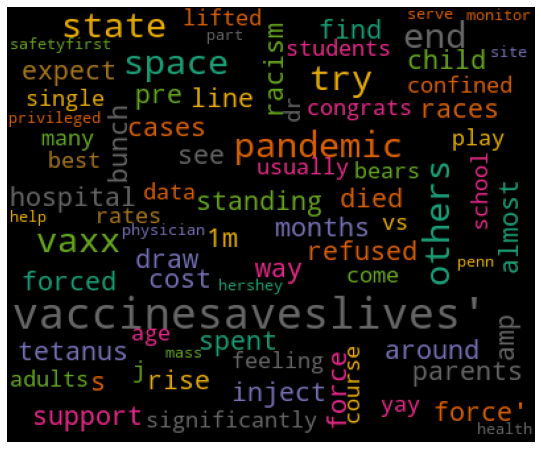

In [42]:
#overall wordcloud of text without preprocessing 

text = df['Text'].values 
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### All processed words

In [43]:
def convert(a_series):
    consolidated_list = []
    str1 = " "
    for each in a_series:
        words_list = ast.literal_eval(each)
        for word in words_list:
            consolidated_list.append(word)
    return (str1.join(consolidated_list))

In [44]:
tweets_string = convert(df["words_processed_all"])


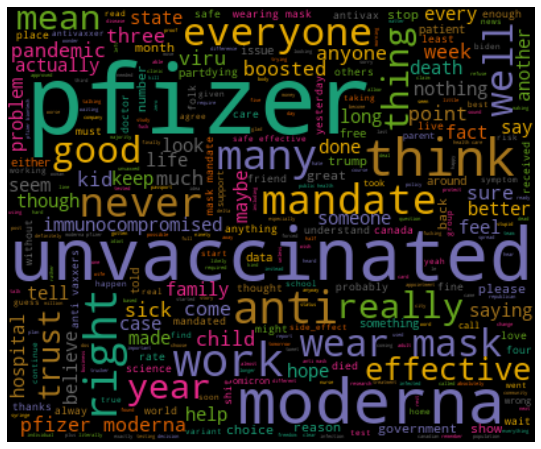

In [45]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### NOUN, ADJ, VERB, ADVERB

In [46]:
tweets_string_nounadj = convert(df["words_processed_noun_adj_verb_adv"])


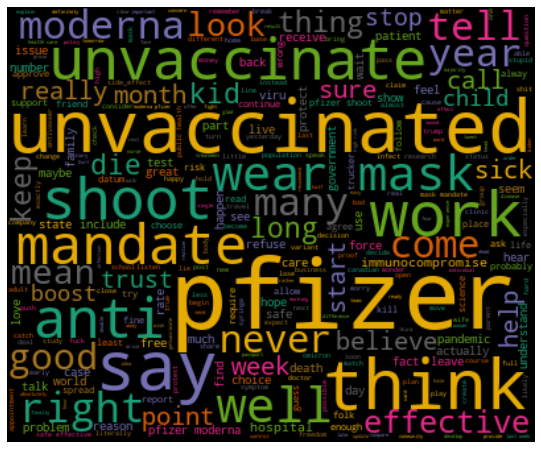

In [47]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_nounadj)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**NOUN**

In [48]:
tweets_string_noun = convert(df["words_processed_noun"])

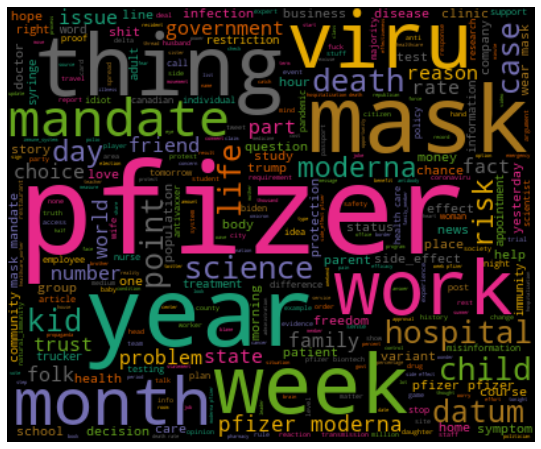

In [49]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_noun)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Count

#### words_processed_all

In [50]:
words_list_all = [ast.literal_eval(each) for each in df["words_processed_all"]]

In [51]:
# List of all words across tweets
all_words = list(itertools.chain(*words_list_all))
all_words_count = collections.Counter(all_words)

In [52]:
all_words_count.most_common(15)

[('vaccine', 125325),
 ('vaccinated', 96592),
 ('unvaccinated', 68179),
 ('covid', 67435),
 ('pfizer', 66102),
 ('people', 63409),
 ('shot', 50037),
 ('moderna', 40645),
 ('booster', 34675),
 ('mask', 28669),
 ('like', 27106),
 ('vaccination', 26510),
 ('anti', 26315),
 ('still', 20632),
 ('getting', 19982)]

#### words_processed_noun_adj_verb_adv

In [53]:
words_list_noun_adj_verb_adv = [ast.literal_eval(each) for each in df["words_processed_noun_adj_verb_adv"]]

In [54]:
# List of all words across tweets
noun_adj_verb_adv_words = list(itertools.chain(*words_list_noun_adj_verb_adv))
noun_adj_verb_adv_words_count = collections.Counter(noun_adj_verb_adv_words)

In [55]:
noun_adj_verb_adv_words_count.most_common(15)

[('vaccine', 122394),
 ('covid', 63940),
 ('pfizer', 63536),
 ('people', 63374),
 ('vaccinate', 51006),
 ('unvaccinated', 48676),
 ('vaccinated', 47337),
 ('booster', 34620),
 ('mask', 28330),
 ('vaccination', 26281),
 ('get', 24891),
 ('shoot', 24456),
 ('shot', 23085),
 ('anti', 22941),
 ('take', 22617)]

#### words_processed_noun

In [56]:
words_list_noun = [ast.literal_eval(each) for each in df["words_processed_noun"]]

In [57]:
# List of all words across tweets
noun_words = list(itertools.chain(*words_list_noun))
noun_words_count = collections.Counter(noun_words)


In [58]:
noun_words_count.most_common(15)

[('vaccine', 116911),
 ('people', 63351),
 ('pfizer', 63009),
 ('booster', 34459),
 ('vaccination', 25854),
 ('mask', 24633),
 ('shot', 21718),
 ('dose', 19545),
 ('time', 16783),
 ('year', 14923),
 ('today', 13322),
 ('moderna', 13042),
 ('mandate', 12794),
 ('death', 12248),
 ('week', 11865)]

### Polarity

In [59]:
from textblob import TextBlob
df['polarity']=df['words_processed_noun_adj_verb_adv'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [60]:
print("3 Random Tweets with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Text']):
  print('Tweets {}:\n'.format(index+1),review)

3 Random Tweets with Highest Polarity:
Tweets 1:
 awesome. i am watching. got moderna dose 1 today.
Tweets 2:
 desantis’ surgeon general won’t say if he’s vaccinated – he gives perfect reason
Tweets 3:
 perfect example: fda panel voted 17-0 favor authorizing pfizer covid-19 vaccine emergency use children aged 5 11 years 🇺🇸 us.


In [61]:
print("3 Random Tweets with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['Text']):
  print('Tweet {}:\n'.format(index+1),review)

3 Random Tweets with Lowest Polarity:
Tweet 1:
 bbc has become trash rag taking vaccine lobbyist money, doing terrible job rag journalism. it shows you how far they have fallen, when they cant even cite their sources, as they did their anti ivm rag journalism.
Tweet 2:
 i’m finding silence these adverse events leaders i trusted like absolutely devastating. it’s like she’d rather i not exist. ignoring adverse events fuels vaccine hesitancy more than believing / helping injured.
Tweet 3:
 bruce brown vaccination psa is so terrible, i can't even start


In [62]:
df.describe()

,word_count,polarity
count,348335.000000,348335.000000
mean,23.981753,0.055739
std,11.556416,0.261227
min,1.000000,-1.000000
25%,14.000000,0.000000
50%,23.000000,0.000000
75%,34.000000,0.200000
max,88.000000,1.000000


### VADER Sentiment

In [63]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harpreet/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8316}

In [65]:
df['scores'] = df['new_text'].apply(lambda tweet: sid.polarity_scores(tweet))
df

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count,polarity,scores
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",43,0.000000,"{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",21,0.000000,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",45,0.130714,"{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",38,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",40,0.102778,"{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co..."
...,...,...,...,...,...,...,...,...,...,...
348330,oh that explains similar - seemingly out nowhe...,oh that explains similar - seemingly out nowhe...,ENGLISH,"[('that', 'DT'), ('explains', 'VBZ'), ('simila...","['explains', 'similar', 'seemingly', 'nowhere'...","['explain', 'similar', 'seemingly', 'nowhere',...","['message', 'screenshot', 'background', 'folk'...",28,-0.108333,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp..."
348331,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"[('eligible', 'JJ'), ('please', 'NN'), ('regis...","['eligible', 'please', 'register', 'covid', 'n...","['eligible', 'register', 'covid', 'vaccination...","['vaccination', 'appointment', 'vaccinesavesli...",12,0.000000,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp..."
348332,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,"[('others', 'NNS'), ('vaccinesaveslives', 'NNS')]","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']",5,-0.125000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
348333,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,"[('congrats', 'NNS'), ('being', 'VBG'), ('full...","['congrats', 'fully', 'vaccinated', 'best', 'f...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'vaccinesaveslive']",13,0.700000,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp..."


In [66]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count,polarity,scores,compound
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",43,0.000000,"{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co...",-0.6249
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",21,0.000000,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.6712
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",45,0.130714,"{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...",0.3400
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",38,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",40,0.102778,"{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co...",-0.4019
...,...,...,...,...,...,...,...,...,...,...,...
348330,oh that explains similar - seemingly out nowhe...,oh that explains similar - seemingly out nowhe...,ENGLISH,"[('that', 'DT'), ('explains', 'VBZ'), ('simila...","['explains', 'similar', 'seemingly', 'nowhere'...","['explain', 'similar', 'seemingly', 'nowhere',...","['message', 'screenshot', 'background', 'folk'...",28,-0.108333,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp...",-0.1779
348331,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"[('eligible', 'JJ'), ('please', 'NN'), ('regis...","['eligible', 'please', 'register', 'covid', 'n...","['eligible', 'register', 'covid', 'vaccination...","['vaccination', 'appointment', 'vaccinesavesli...",12,0.000000,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.3182
348332,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,"[('others', 'NNS'), ('vaccinesaveslives', 'NNS')]","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']",5,-0.125000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
348333,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,"[('congrats', 'NNS'), ('being', 'VBG'), ('full...","['congrats', 'fully', 'vaccinated', 'best', 'f...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'vaccinesaveslive']",13,0.700000,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.9147


In [67]:
df["compound"].value_counts()

 0.0000    63273
-0.2960     5741
 0.3612     5711
 0.4404     4856
 0.4019     3884
           ...  
 0.5700        1
 0.9830        1
 0.5633        1
 0.8517        1
 0.3157        1
Name: compound, Length: 15239, dtype: int64

In [68]:
sentiment = []
for each in df["compound"]:
    if each == 0:
        sentiment.append("neutral")
    elif each > 0:
        sentiment.append("positive")
    else:
        sentiment.append("negative")

In [69]:
df["sentiment"] = sentiment

<AxesSubplot:>

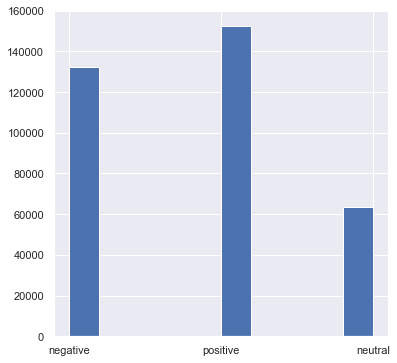

In [70]:
df["sentiment"].hist()